In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
yelp = pd.read_csv ("yelp.csv")

In [44]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [45]:
yelp.shape

(10000, 10)

In [46]:
yelp['type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       review
1       review
2       review
3       review
4       review
         ...  
9995    review
9996    review
9997    review
9998    review
9999    review
Name: type, Length: 10000, dtype: object>

In [47]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [48]:
yelp.loc[:][['text', 'stars']]

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
5,"Quiessence is, simply put, beautiful. Full wi...",4
6,Drop what you're doing and drive here. After I...,5
7,"Luckily, I didn't have to travel far to make m...",4
8,Definitely come for Happy hour! Prices are ama...,4
9,Nobuo shows his unique talents with everything...,5


In [49]:
yelp['text_length'] = yelp.iloc[:]['text'].apply (len)

In [50]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


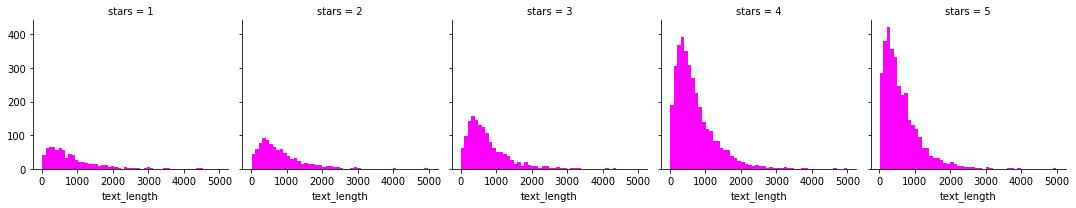

In [56]:
g = sns.FacetGrid (data = yelp, col='stars')
g.map (plt.hist, 'text_length', bins=50, color='magenta')

In [36]:
star_value = yelp.groupby ('stars').mean()
star_value

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [66]:
star_value.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


In [68]:
X = yelp.loc[:]['text']
y = yelp.loc[:]['stars']

In [70]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [64]:
class Multinomial_NB_Model:
    def __init__ (self):
        self.vectorizer = TfidfVectorizer()
        self.model = MultinomialNB()
        
    def train (self, X, y):
        X = self.vectorizer.fit_transform (X)
        self.feature_names = self.vectorizer.get_feature_names()
        
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=7)
        self.model.fit (X_train, y_train)
        predicted = self.model.predict (X_test)
        self.accuracy_score = accuracy_score (y_test, predicted)
        print ("Accuracy of the Multinomial Naive Bayes Model: ", self.accuracy_score)
        
    def predict (self, X, y):
        pass

In [72]:
nb_model = Multinomial_NB_Model()
nb_model.train (X, y)

Accuracy of the Multinomial Naive Bayes Model:  0.431
